In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

import plotly.offline as plt

# pyo.init_notebook_model()
import plotly.express as px
import plotly.offline as pyo

%matplotlib inline

In [2]:
df = pd.read_csv("movie streams.csv")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'movie streams.csv'

Rotten Tomatoes is an American review-aggregation website for film and television.

In [ ]:
cols = df.columns.tolist()
cols

['Unnamed: 0',
 'ID',
 'Title',
 'Year',
 'Age',
 'IMDb',
 'Rotten Tomatoes',
 'Netflix',
 'Hulu',
 'Prime Video',
 'Disney+',
 'Type',
 'Directors',
 'Genres',
 'Country',
 'Language',
 'Runtime']

In [ ]:
df.drop(['Unnamed: 0', 'ID',], axis=1, inplace=True)
cols = df.columns.tolist()
cols

['Title',
 'Year',
 'Age',
 'IMDb',
 'Rotten Tomatoes',
 'Netflix',
 'Hulu',
 'Prime Video',
 'Disney+',
 'Type',
 'Directors',
 'Genres',
 'Country',
 'Language',
 'Runtime']

Check For Missing Values

In [ ]:
df.isna().sum()

Title                  0
Year                   0
Age                 9390
IMDb                 571
Rotten Tomatoes    11586
Netflix                0
Hulu                   0
Prime Video            0
Disney+                0
Type                   0
Directors            726
Genres               275
Country              435
Language             599
Runtime              592
dtype: int64

As we can see, there are missing values in the some of the columns. We will not drop these coplumns for now.

NOTE: Dropping a value in your dataset should be the last option to consider. There are better ways to deal with missing values in your dataset.

There is a detail and well explained tutorial on dealing with missing values and other featurung engineering techniques.

#### Let's remove the '+' sign attached to the values in the Age column.

In [ ]:
df['Age']

0        13+
1        18+
2        13+
3         7+
4        18+
        ... 
16739    NaN
16740     7+
16741    NaN
16742    NaN
16743    NaN
Name: Age, Length: 16744, dtype: object

In [ ]:
age_map = {'18+' : 18, '7+' : 7, '13': 13, 'all' : 0, '16+' : 16 }
df['AgeCopy'] = df['Age'].map(age_map)
df['AgeCopy']

0         NaN
1        18.0
2         NaN
3         7.0
4        18.0
         ... 
16739     NaN
16740     7.0
16741     NaN
16742     NaN
16743     NaN
Name: AgeCopy, Length: 16744, dtype: float64

#### Let's remove the '%' sign attached to the values in the Rotten Tomatoes column.

In [ ]:
df['New_Rotten_Tomamtoes'] = df['Rotten Tomatoes'].str.replace("%", "")
for i in df['New_Rotten_Tomamtoes']:
    if i == str:
        i.astype(int)
df['New_Rotten_Tomamtoes']

0         87
1         87
2         84
3         96
4         97
        ... 
16739    NaN
16740    NaN
16741    NaN
16742    NaN
16743    NaN
Name: New_Rotten_Tomamtoes, Length: 16744, dtype: object

# **Visualisations**

### What is the number if movies for each age group

In [ ]:
# pip install plotly==4.14.1

In [ ]:
# !pip install "notebook>=5.3" "ipywidgets>=7.2"

In [ ]:
!pip install jupyterlab "ipywidgets>=7.5"



[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
df['Age'].value_counts()

18+    3474
7+     1462
13+    1255
all     843
16+     320
Name: Age, dtype: int64

In [ ]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Top 10 languages in Streaming Services

In [ ]:
import matplotlib.pyplot as plt

<Axes: title={'center': 'Top 10 languages in Streaming Services'}>

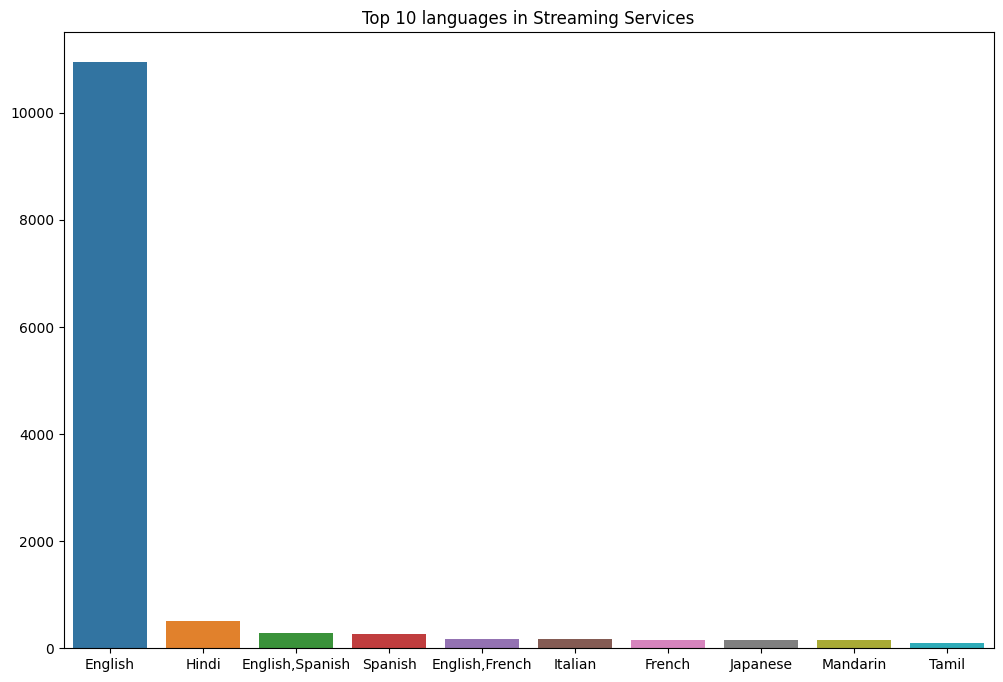

In [ ]:
# counting and assigning the 10 top values to a variable
languages = df.Language.value_counts().head(10)

plt.figure(figsize=(12,8))
plt.title('Top 10 languages in Streaming Services')
sns.barplot(x=languages.index, y=languages.values)

In [ ]:
pip install plotly ipython

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from plotly.offline import init_notebook_mode, iplot
import plotly.express as px
import pandas as pd


In [ ]:
from IPython.display import HTML
import plotly.express as px
fig = px.pie(df,
             values=languages.values,
             names=languages.index,
             title='Top 10 languages in Streaming Services',
             height=600)
iplot(fig)

**Number of Movies in specific age group in All sevices**

In [ ]:
fig = px.bar(df,
             x=df['Age'].value_counts().index,
             y = df['Age'].value_counts(),
             title = 'Number of Movies in specific age group in All sevices',
             text=df['Age'].value_counts(),
             height=600)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside') # for the text to be outside
iplot(fig)

Number of Movies in specific age group in Netflix

In [ ]:
netflix_df=df[df['Netflix']==1]
fig = px.bar(netflix_df, 
             x=netflix_df['Age'].value_counts().index, 
             y=netflix_df['Age'].value_counts(),
             title="Number of Movies in specific age group in Netflix",
             text=netflix_df['Age'].value_counts(), 
             height=600)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside') #for the text to be outside
iplot(fig)

Number of Movies in specific age group in Amazon Prime Video

In [ ]:
prime_df=df[df['Prime Video']==1]
fig = px.bar(netflix_df, 
             x=prime_df['Age'].value_counts().index, 
             y=prime_df['Age'].value_counts(),
             title="Number of Movies in specific age group in Amazon Prime Video",
             text=prime_df['Age'].value_counts(), 
             height=600)
fig.update_traces(marker_color='lightsalmon',texttemplate='%{text:.2s}', textposition='outside') #for the text to be outside.
iplot(fig)

Number of Movies in specific age group in Disney+

In [ ]:
Disney_df=df[df['Disney+']==1]
fig = px.bar(netflix_df, 
             x=Disney_df['Age'].value_counts().index, 
             y=Disney_df['Age'].value_counts(),
             title="Number of Movies in specific age group in Disney+ Video",
             text=Disney_df['Age'].value_counts(), 
             height=600)
fig.update_traces(marker_color='red',texttemplate='%{text:.2s}', textposition='outside') #for the text to be outside.
iplot(fig)

Number of Movies in specific age group in Hulu

In [ ]:
Hulu_df=df[df['Hulu']==1]
fig = px.bar(netflix_df, 
             x=Hulu_df['Age'].value_counts().index, 
             y=Hulu_df['Age'].value_counts(),
             title="Number of Movies in specific age group in Hulu Video",
             text=Hulu_df['Age'].value_counts(), 
             height=600)
fig.update_traces(marker_color='black',texttemplate='%{text:.2s}', textposition='outside') #for the text to be outside.
iplot(fig)

# **Rotten Tomatoes Score**

A Tomatometer score is calulated for a movie or TV show after it receive at least five reviews. Whem at least 60% of reviews for a movie or TV show are positive, a red tomato is displayed to indicate its Fresh status.

Rotten Tomatoes gives films a score out of 100 based on the averaged reviews of professional film critics. If a film gets a rating of 60 or more it gets a 'fresh' red tomato on the site. Less than 60 and it gets a rotten tomato.

In [ ]:
fig = px.bar(df, 
             x=df['Rotten Tomatoes'].value_counts().index, 
             y=df['Rotten Tomatoes'].value_counts(),
             title="Overall Rotten Tomato Ratings",
             text=df['Rotten Tomatoes'].value_counts(), 
             height=600)
fig.update_traces(marker_color='blue',texttemplate='%{text:.2s}', textposition='outside') #for the text to be outside.
iplot(fig)

#### **Rotten Tomato Ratings For Each Services**

In [ ]:
rt_scores = pd.DataFrame({'Streaming Service': ["Prime Video", "Hulu","Disney+","NetFlix"],
                                    'Rotten Tomato Score' : [netflix_df['Rotten Tomatoes'].value_counts()[0], 
                                                             prime_df['Rotten Tomatoes'].value_counts()[0],
                                                             Disney_df['Rotten Tomatoes'].value_counts()[0],
                                                             Hulu_df['Rotten Tomatoes'].value_counts()[0]]})

rt_scores.head()

,Streaming Service,Rotten Tomato Score
0,Prime Video,130
1,Hulu,257
2,Disney+,19
3,NetFlix,18


In [ ]:
sorted_rt_score = rt_scores.sort_values(ascending=False, by="Rotten Tomato Score")
sorted_rt_score

,Streaming Service,Rotten Tomato Score
1,Hulu,257
0,Prime Video,130
2,Disney+,19
3,NetFlix,18


In [ ]:
fig = px.bar(sorted_rt_score, 
             x=sorted_rt_score['Streaming Service'], 
             y=sorted_rt_score['Rotten Tomato Score'],
             title="Rotten Tomato Ratings For Each Services",
             text=sorted_rt_score['Rotten Tomato Score'], 
             height=600)
fig.update_traces(marker_color='purple',texttemplate='%{text:.2s}', textposition='outside') #for the text to be outside.
iplot(fig)

We can see that Prime Video has 260 Rotten Tomato Score

## **IMDB Ratings**

In [ ]:
fig = px.bar(df, 
             y=df['IMDb'].value_counts(), 
             x=df['IMDb'].value_counts().index,
             title="Overall IMDb Ratings For All Services",
             text=df['IMDb'].value_counts(), 
             height=600)
fig.update_traces(marker_color='purple',texttemplate='%{text:.2s}', textposition='outside') #for the text to be outside.
iplot(fig)

NB: You can also do the IMDb rating for each streaming service.

### **Count Of Rintimes Of Movies**

In [ ]:
RuntimeCount = pd.DataFrame(dict(df['Runtime'].value_counts().sort_values(ascending=False)[:10]).items(), columns=['Runtime', 'Count'])

RuntimeCount

,Runtime,Count
0,90.0,971
1,95.0,489
2,92.0,434
3,93.0,422
4,85.0,408
...,...,...
152,19.0,8
153,32.0,8
154,9.0,8
155,7.0,8
